In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

UU_YELLOW = "#FFCD00"
UU_RED = "#C00A35"
UU_CREME = "#FFE6AB"
UU_ORANGE = "#F3965E"
UU_BURGUNDY = "#AA1555"
UU_BROWN = "#6E3B23"
UU_PAL = sns.color_palette([UU_YELLOW, UU_RED, UU_CREME, UU_ORANGE, UU_BURGUNDY, UU_BROWN]) # Make pallete

In [2]:
# Load csv file

fp = "UCI_Credit_Card.csv"

df = pd.read_csv(fp)
# Drop the ID column
df = df.drop(columns=["ID"])
# Drop rows where MARRIAGE is not in {1, 2}, ignoring 0 as it should not exist and ignoring 3 which is other
df = df[df["MARRIAGE"].isin([1, 2])]
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


{'No': 0.78, 'Yes': 0.22}


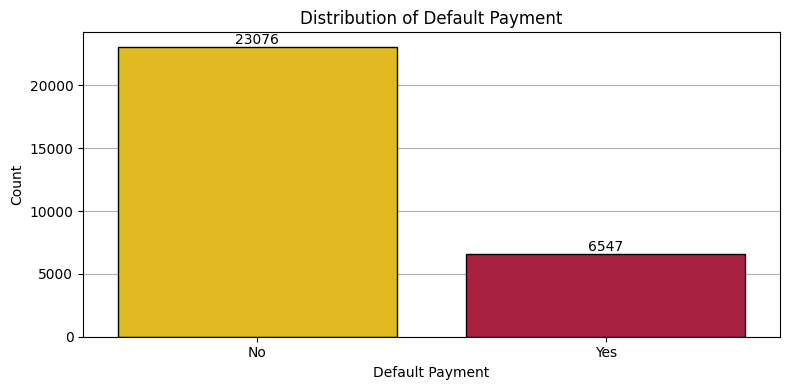

In [3]:
# Calculate percentage of default payment
labels = ["No", "Yes"]
percentage = df["default.payment.next.month"].value_counts(normalize=True).round(2).to_dict()
percentage = {labels[int(k)]: v for k, v in percentage.items()}  # Map the values to the labels
print(percentage)

# Plot distribution of default payment
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black")
ax.bar_label(ax.containers[0], fmt="%.0f")  # Label count on bar

ax.set_title("Distribution of Default Payment")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(labels)  # Whether client default payment next month
plt.tight_layout()
plt.savefig("images/default_payment.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{'No': {'Male': 0.76, 'Female': 0.79}, 'Yes': {'Male': 0.24, 'Female': 0.21}}


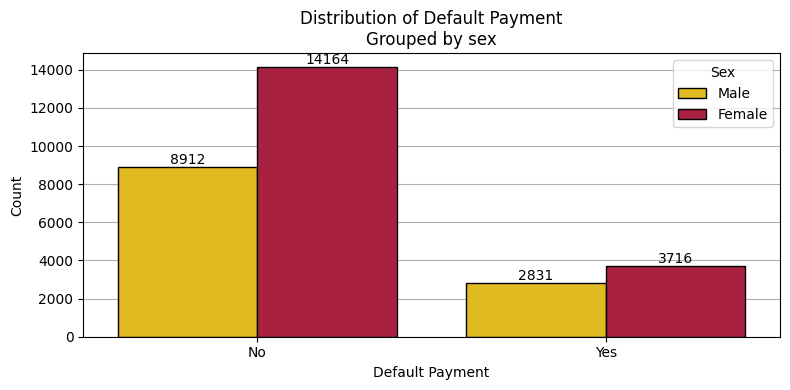

In [4]:
# Calculate percentage of default payment, grouped per gender
labels_sex = ("Male", "Female")
percentage_sex = df[["SEX", "default.payment.next.month"]].groupby(["SEX", "default.payment.next.month"]).size().unstack(
    fill_value=0).apply(lambda x: x / x.sum(), axis=1).round(2).to_dict()

percentage_sex = {labels[int(k)]: {labels_sex[int(kk)-1]: vv for kk, vv in v.items()}
              for k, v in percentage_sex.items()}  # Map the values to the labels
print(percentage_sex)

# Plot distribution of default payment, group by gender
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="SEX")
ax.bar_label(ax.containers[0], fmt="%.0f")  # Label count on bar
ax.bar_label(ax.containers[1], fmt="%.0f")

ax.set_title("Distribution of Default Payment\nGrouped by sex")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(labels)  # Whether client default payment next month
plt.legend(title="Sex", labels=labels_sex)

plt.tight_layout()
plt.savefig("images/default_payment_gender.eps", format="eps")
plt.show()

{'No': {'Married': 0.77, 'Single': 0.79}, 'Yes': {'Married': 0.23, 'Single': 0.21}}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


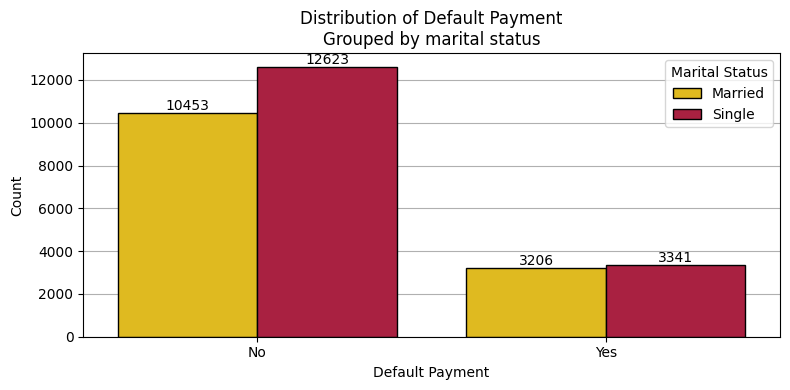

In [5]:
# Calculate percentage of default payment, grouped per gender
labels_marital = ("Married", "Single", "Other")
percentage_marriage = df[["MARRIAGE", "default.payment.next.month"]].groupby(["MARRIAGE", "default.payment.next.month"]).size().unstack(
    fill_value=0).apply(lambda x: x / x.sum(), axis=1).round(2).to_dict()

percentage_marriage = {labels[int(k)]: {labels_marital[int(kk)-1]: vv for kk, vv in v.items()}
              for k, v in percentage_marriage.items()}  # Map the values to the labels
print(percentage_marriage)

# Plot distribution of default payment, group by gender
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="MARRIAGE")
for c in ax.containers:
    ax.bar_label(c, fmt="%.0f")  # Label count on bar

ax.set_title("Distribution of Default Payment\nGrouped by marital status")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(["No", "Yes"])  # Whether client default payment next month
plt.legend(title="Marital Status", labels=labels_marital)

plt.tight_layout()
plt.savefig("images/default_payment_marital.eps", format="eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{'No': {'Married Men': 0.74, 'Married Women': 0.77, 'Single Men': 0.78, 'Single Women': 0.8}, 'Yes': {'Married Men': 0.26, 'Married Women': 0.23, 'Single Men': 0.22, 'Single Women': 0.2}}


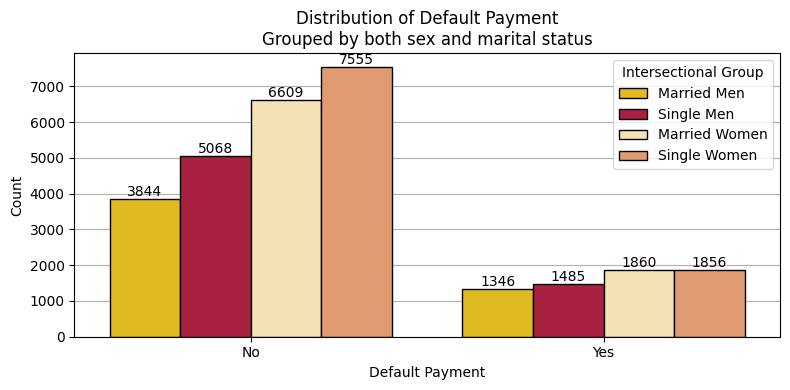

In [6]:
# Make new column for intersectional group combining sex and marital status
df["intersection"] = (df["SEX"].astype(str) + df["MARRIAGE"].astype(str)).astype(int)
labels_intersection = {11: "Married Men", 21: "Single Men", 12: "Married Women", 22: "Single Women"}

# Calculate percentage for intersectional group
percentage_intersect = df[["intersection", "default.payment.next.month"]].groupby(["intersection", "default.payment.next.month"]).size().unstack(
    fill_value=0).apply(lambda x: x / x.sum(), axis=1).round(2).to_dict()
percentage_intersect = {labels[int(k)]: {labels_intersection[int(kk)]: vv for kk, vv in v.items()}
              for k, v in percentage_intersect.items()}  # Map the values to the labels
print(percentage_intersect)

# Plot distribution of default payment, group by gender
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="default.payment.next.month", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="intersection")
for c in ax.containers:
    ax.bar_label(c, fmt="%.0f")  # Label count on bar

ax.set_title("Distribution of Default Payment\nGrouped by both sex and marital status")
ax.set_xlabel("Default Payment")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xticklabels(["No", "Yes"])  # Whether client default payment next month
plt.legend(title="Intersectional Group", labels=labels_intersection.values())

plt.tight_layout()
plt.savefig("images/default_payment_both.eps", format="eps")
plt.show()

In [7]:
# Percentages
print(percentage)
print(percentage_sex)
print(percentage_marriage)
print(percentage_intersect)

# Statistical parity between men and women
# P[D = 1│A = a] = P[D = 1│A = b] with A: sensitive attribute, D: decision, Y: outcome
stat_parity_sex = percentage_sex["Yes"]["Female"] / percentage_sex["Yes"]["Male"]
print(f"Statistical parity ratio between women and men: {stat_parity_sex:.2f}")

stat_parity_marriage = percentage_marriage["Yes"]["Single"] / percentage_marriage["Yes"]["Married"]
print(f"Statistical parity ratio between single and married: {stat_parity_marriage:.2f}")

stat_parity_both_married = percentage_intersect["Yes"]["Married Women"] / percentage_intersect["Yes"]["Married Men"]
print(f"Statistical parity ratio between married women and married men: {stat_parity_both_married:.2f}")

stat_parity_both_single = percentage_intersect["Yes"]["Single Women"] / percentage_intersect["Yes"]["Single Men"]
print(f"Statistical parity ratio between single women and single men: {stat_parity_both_single:.2f}")


{'No': 0.78, 'Yes': 0.22}
{'No': {'Male': 0.76, 'Female': 0.79}, 'Yes': {'Male': 0.24, 'Female': 0.21}}
{'No': {'Married': 0.77, 'Single': 0.79}, 'Yes': {'Married': 0.23, 'Single': 0.21}}
{'No': {'Married Men': 0.74, 'Married Women': 0.77, 'Single Men': 0.78, 'Single Women': 0.8}, 'Yes': {'Married Men': 0.26, 'Married Women': 0.23, 'Single Men': 0.22, 'Single Women': 0.2}}
Statistical parity ratio between women and men: 0.88
Statistical parity ratio between single and married: 0.91
Statistical parity ratio between married women and married men: 0.88
Statistical parity ratio between single women and single men: 0.91


C:\Users\denbe\AppData\Local\Temp\ipykernel_15060\4057595266.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(x="LIMIT_BAL", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="SEX", multiple="dodge", bins=20, kde=True, shrink=.8)
C:\Users\denbe\AppData\Local\Temp\ipykernel_15060\4057595266.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(tick):,}" for tick in ax.get_xticks().tolist()])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


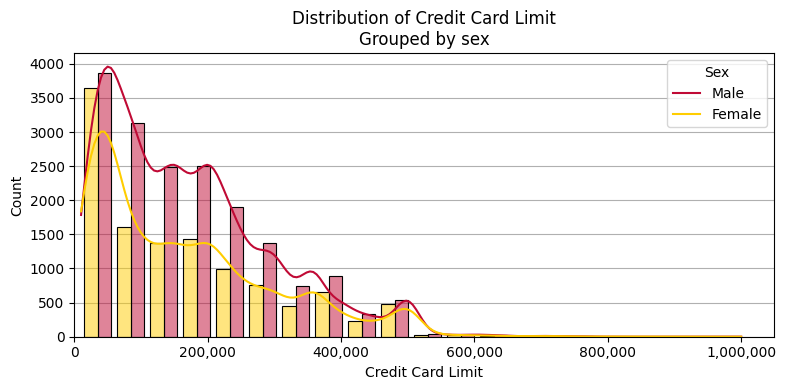

In [8]:
# Plot histogram of credit card limit, grouped by sex
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(x="LIMIT_BAL", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="SEX", multiple="dodge", bins=20, kde=True, shrink=.8)

ax.set_title("Distribution of Credit Card Limit\nGrouped by sex")
ax.set_xlabel("Credit Card Limit")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xlim(0, None)
# Set x-axis labels to integer instead of scientific notation
ax.set_xticklabels([f"{int(tick):,}" for tick in ax.get_xticks().tolist()])
plt.legend(title="Sex", labels=labels_sex)

plt.tight_layout()
plt.savefig("images/credit_limit_sex.eps", format="eps")
plt.show()

C:\Users\denbe\AppData\Local\Temp\ipykernel_15060\2098687699.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(x="LIMIT_BAL", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="MARRIAGE", multiple="dodge", bins=20, kde=True, shrink=.8)
C:\Users\denbe\AppData\Local\Temp\ipykernel_15060\2098687699.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(tick):,}" for tick in ax.get_xticks().tolist()])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


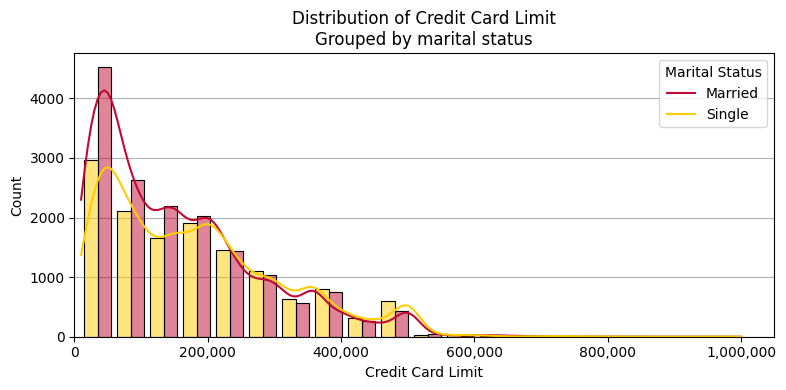

In [9]:
# Plot histogram of credit card limit, grouped by sex
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(x="LIMIT_BAL", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="MARRIAGE", multiple="dodge", bins=20, kde=True, shrink=.8)

ax.set_title("Distribution of Credit Card Limit\nGrouped by marital status")
ax.set_xlabel("Credit Card Limit")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xlim(0, None)
# Set x-axis labels to integer instead of scientific notation
ax.set_xticklabels([f"{int(tick):,}" for tick in ax.get_xticks().tolist()])
plt.legend(title="Marital Status", labels=labels_marital[:2])

plt.tight_layout()
plt.savefig("images/credit_limit_marital.eps", format="eps")
plt.show()

C:\Users\denbe\AppData\Local\Temp\ipykernel_15060\2328688117.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.histplot(x="LIMIT_BAL", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="intersection", multiple="dodge", bins=20, kde=True, shrink=.8)
C:\Users\denbe\AppData\Local\Temp\ipykernel_15060\2328688117.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{int(tick):,}" for tick in ax.get_xticks().tolist()])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


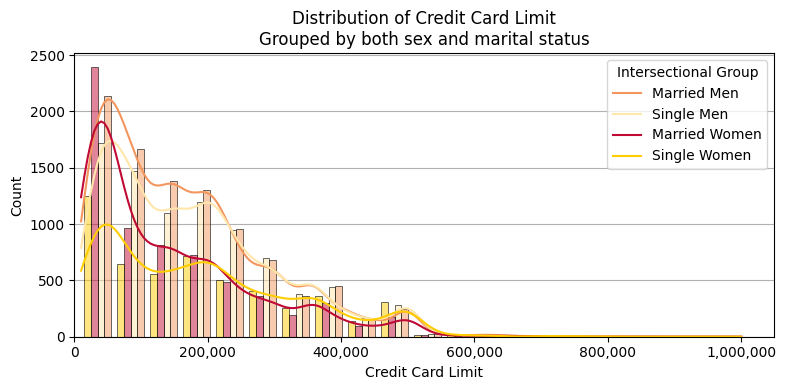

In [10]:
# Plot histogram of credit card limit, grouped by sex
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(x="LIMIT_BAL", data=df, ax=ax, palette=UU_PAL, edgecolor="black", hue="intersection", multiple="dodge", bins=20, kde=True, shrink=.8)

ax.set_title("Distribution of Credit Card Limit\nGrouped by both sex and marital status")
ax.set_xlabel("Credit Card Limit")
ax.set_ylabel("Count")
ax.set_axisbelow(True)  # For the grid lines to be behind the bars
ax.grid(axis="y")  # Only horizontal grid lines
ax.set_xlim(0, None)
# Set x-axis labels to integer instead of scientific notation
ax.set_xticklabels([f"{int(tick):,}" for tick in ax.get_xticks().tolist()])
plt.legend(title="Intersectional Group", labels=labels_intersection.values())

plt.tight_layout()
plt.savefig("images/credit_limit_both.eps", format="eps")
plt.show()